<a href="https://colab.research.google.com/github/JigyasaIIFM/kerala/blob/master/MultiLabel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 197 kB 4.8 MB/s 
     |████████████████████████████████| 59 kB 7.9 MB/s 


# New Section

In [2]:
from fastai.vision.all import *

## Set up Data

In [3]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2022-06-01 10:24:30--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip’

UCMerced_LandUse.zi 100%[===================>] 317.07M  18.3MB/s    in 14s     

2022-06-01 10:24:44 (23.1 MB/s) - ‘UCMerced_LandUse.zip’ saved [332468434/332468434]



In [4]:
!unzip UCMerced_LandUse.zip

Archive:  UCMerced_LandUse.zip
   creating: UCMerced_LandUse/Images/
   creating: UCMerced_LandUse/Images/agricultural/
  inflating: UCMerced_LandUse/Images/agricultural/agricultural00.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural01.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural02.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural03.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural04.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural05.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural06.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural07.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural08.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural09.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural10.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural11.tif  
  inflating: UCMerced_LandUs

In [5]:
path = Path("/content/UCMerced_LandUse/Images")
items = get_image_files(path)
items

(#2100) [Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond00.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond37.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond47.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond09.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond23.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond84.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond52.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond30.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond04.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond93.tif')...]

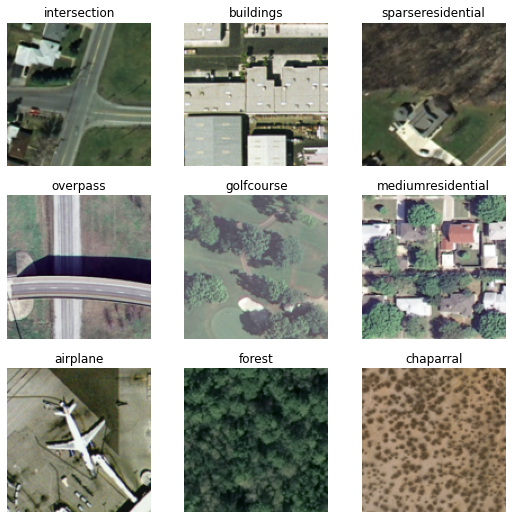

In [6]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),  get_items=get_image_files,  splitter=RandomSplitter(valid_pct=0.3, seed=42), get_y=parent_label, item_tfms=Resize(128))
dls = data.dataloaders(path, item_tfms=Resize(128))
dls.valid.show_batch()

## Train Deep learning Model (Transfer Learning)

In [7]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.054067,0.714278,0.209524,01:44


epoch,train_loss,valid_loss,error_rate,time
0,0.896810,0.455590,0.128571,02:25
1,0.552192,0.315288,0.082540,02:25
2,0.338946,0.271647,0.076190,02:24
3,0.221611,0.247232,0.068254,02:23
4,0.153473,0.248043,0.068254,02:23


## Interpretation

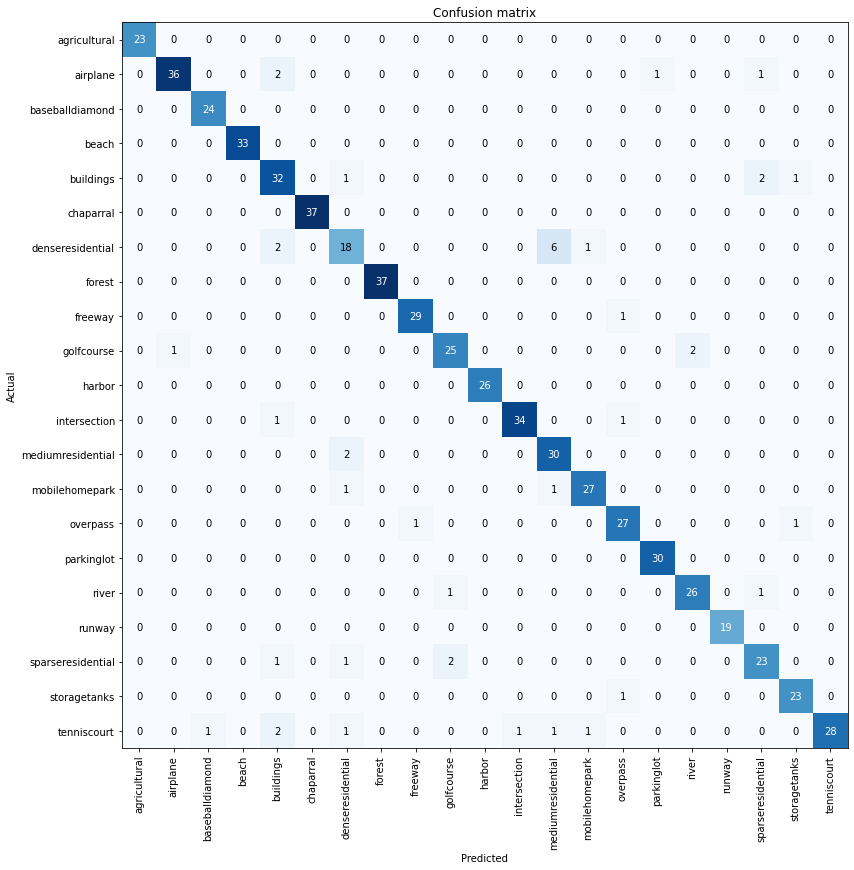

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12))

## Inference

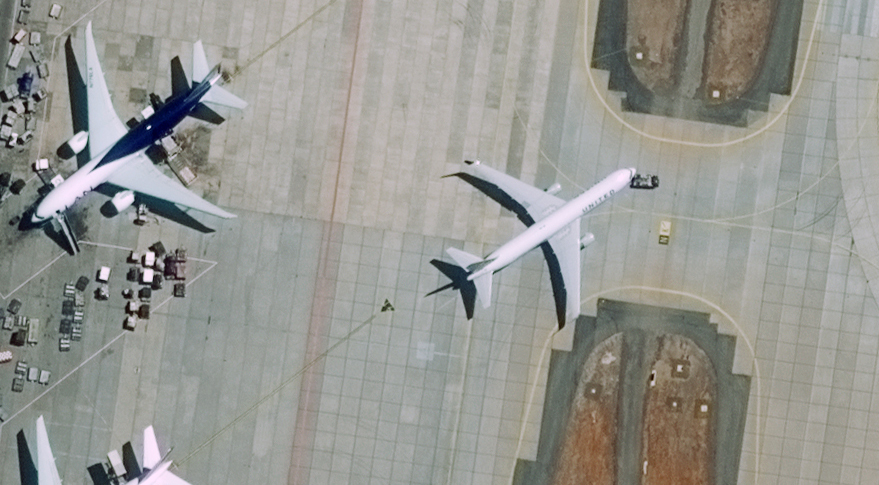



In [ ]:
![title](img/picture.png)

In [ ]:
learn.predict("/content/30_centimeter_satellite_imagery_CHL_Santiago_Airport_1.jpg")[0]

'airplane'